# Building CNN - Convolutional Neural Network
# Project Fashion-Classification - End to End
Train convolutional Neural Network on 60000 Fashion-MNIST Images (data in NP array)
Test convolutional Neural Network on 10000 Fashion-MNIST Images (data in NP array)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0:5]

array([9, 0, 0, 3, 0], dtype=uint8)

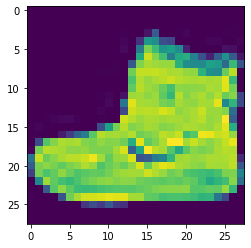

In [ ]:
plt.imshow(X_train[0])

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
                "Sandal","Shirt","Sneaker","Bag","Ankel boot"]
'''
0 =>"T-shirt/top"
1 =>"Trouser"
2 =>"Pullover"
3 =>"Dress"
4 =>"Coat"
5 =>"Sandal"
6 =>"Shirt"
7 =>"Sneaker"
8 =>"Bag"
9 =>"Ankel boot"
'''

'\n0 =>"T-shirt/top"\n1 =>"Trouser"\n2 =>"Pullover"\n3 =>"Dress"\n4 =>"Coat"\n5 =>"Sandal"\n6 =>"Shirt"\n7 =>"Sneaker"\n8 =>"Bag"\n9 =>"Ankel boot"\n'

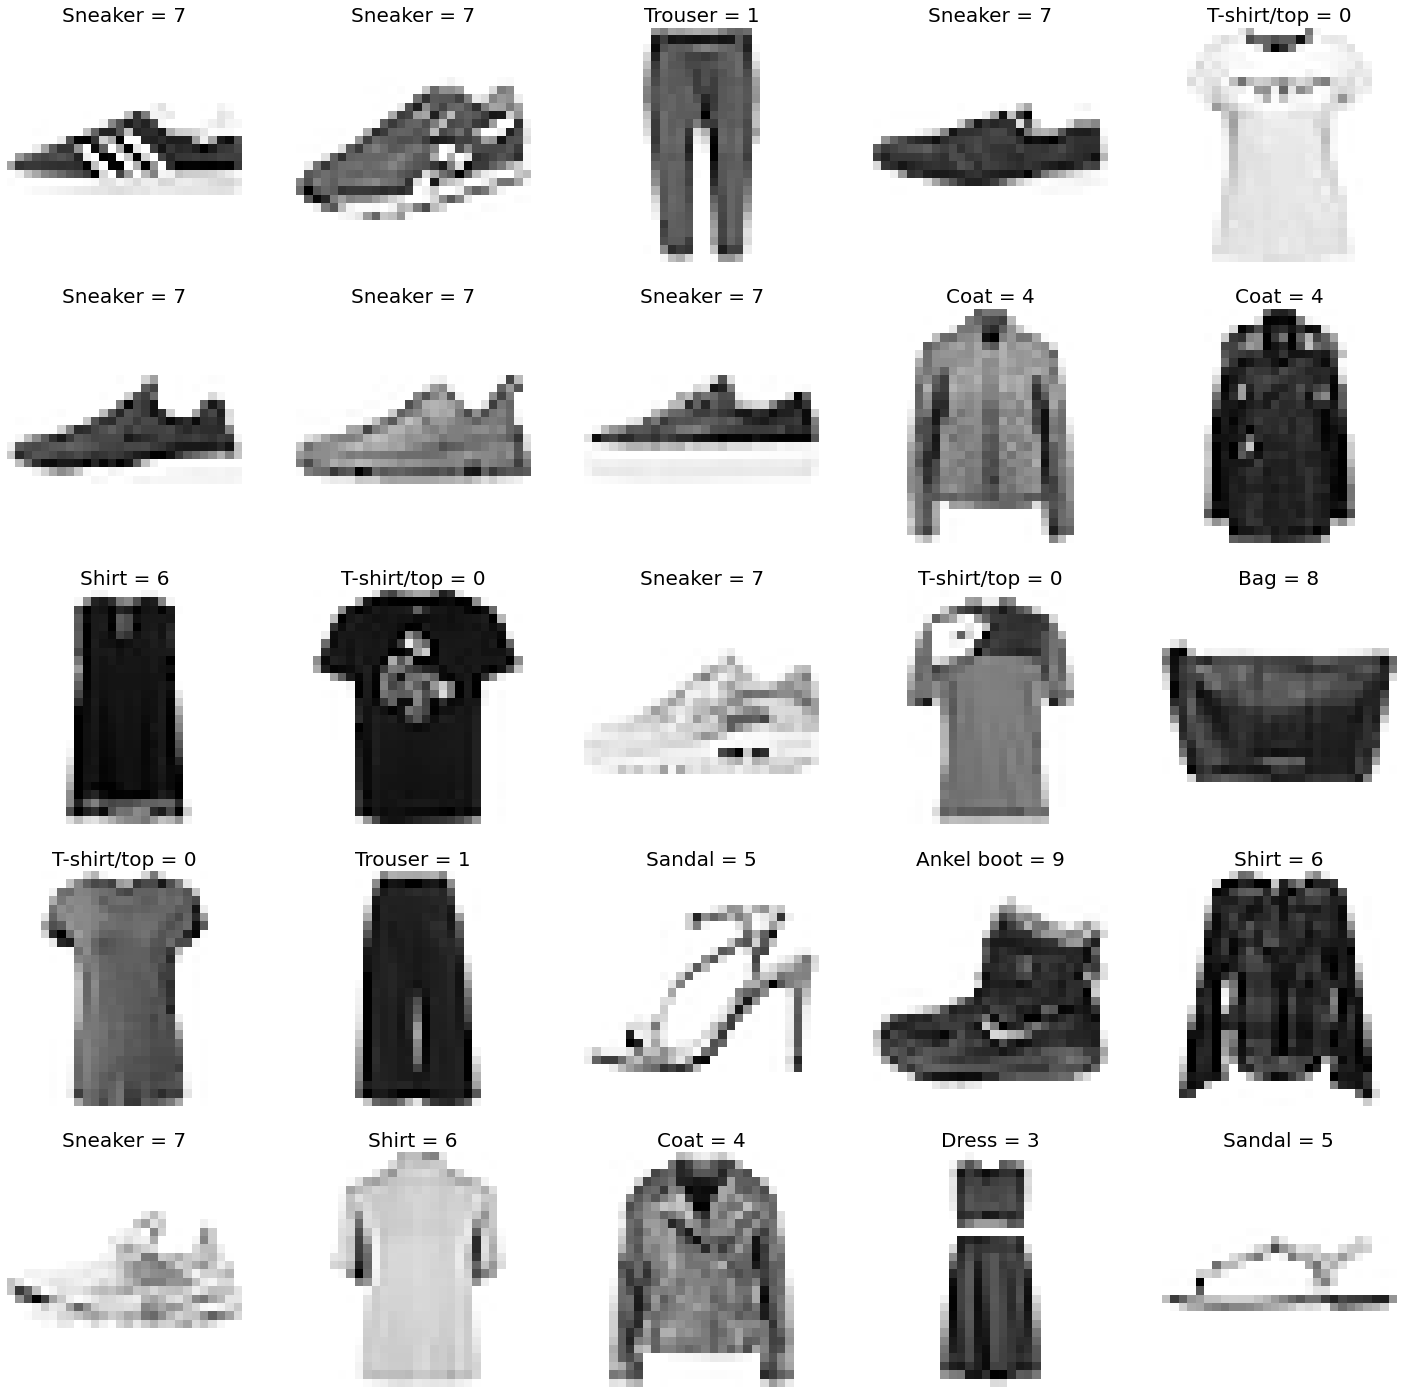

In [ ]:
plt.figure(figsize = (25,25))
j = 1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(X_train[i],cmap = 'Greys')
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+" = "+str(y_train[i]),fontsize =20)

# Change Dimension

In [ ]:
X_train.ndim

3

In [ ]:
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

# Feature Scaling

In [ ]:
X_train = X_train/255
X_test = X_test/255

# Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val  = train_test_split(X_train,y_train,test_size = 0.2 , random_state = 20)

In [ ]:
X_train.shape,y_train.shape

((48000, 28, 28, 1), (48000,))

In [ ]:
X_val.shape,y_val.shape

((12000, 28, 28, 1), (12000,))

# Convolutional Neural Network - Model Building

In [ ]:
from warnings import filters
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32 , kernel_size = 3,strides = (1,1),padding = 'valid',activation = 'relu',input_shape = [28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128,activation = 'relu'), 
    keras.layers.Dense(units = 10,activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
             metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 10,batch_size=512,verbose=1,validation_data = (X_val,y_val))

Epoch 1/10
94/94 [==============================] - 15s 12ms/step - loss: 0.6305 - accuracy: 0.7868 - val_loss: 0.4028 - val_accuracy: 0.8587
Epoch 2/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3712 - accuracy: 0.8699 - val_loss: 0.3424 - val_accuracy: 0.8783
Epoch 3/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3216 - accuracy: 0.8870 - val_loss: 0.3154 - val_accuracy: 0.8875
Epoch 4/10
94/94 [==============================] - 1s 9ms/step - loss: 0.2948 - accuracy: 0.8977 - val_loss: 0.2954 - val_accuracy: 0.8955
Epoch 5/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2761 - accuracy: 0.9031 - val_loss: 0.2863 - val_accuracy: 0.8982
Epoch 6/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2579 - accuracy: 0.9099 - val_loss: 0.2720 - val_accuracy: 0.9020
Epoch 7/10
94/94 [==============================] - 1s 8ms/step - loss: 0.2415 - accuracy: 0.9150 - val_loss: 0.2693 - val_accuracy: 0.9034
Epoch 8/10
94/94 [

# Test the model

In [ ]:
model.predict(np.expand_dims(X_test[0],axis =0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96]],
      dtype=float32)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2672 - accuracy: 0.9028


[0.2671714425086975, 0.9028000235557556]

In [ ]:
y_pred = model.predict(X_test)
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
      dtype=float32)

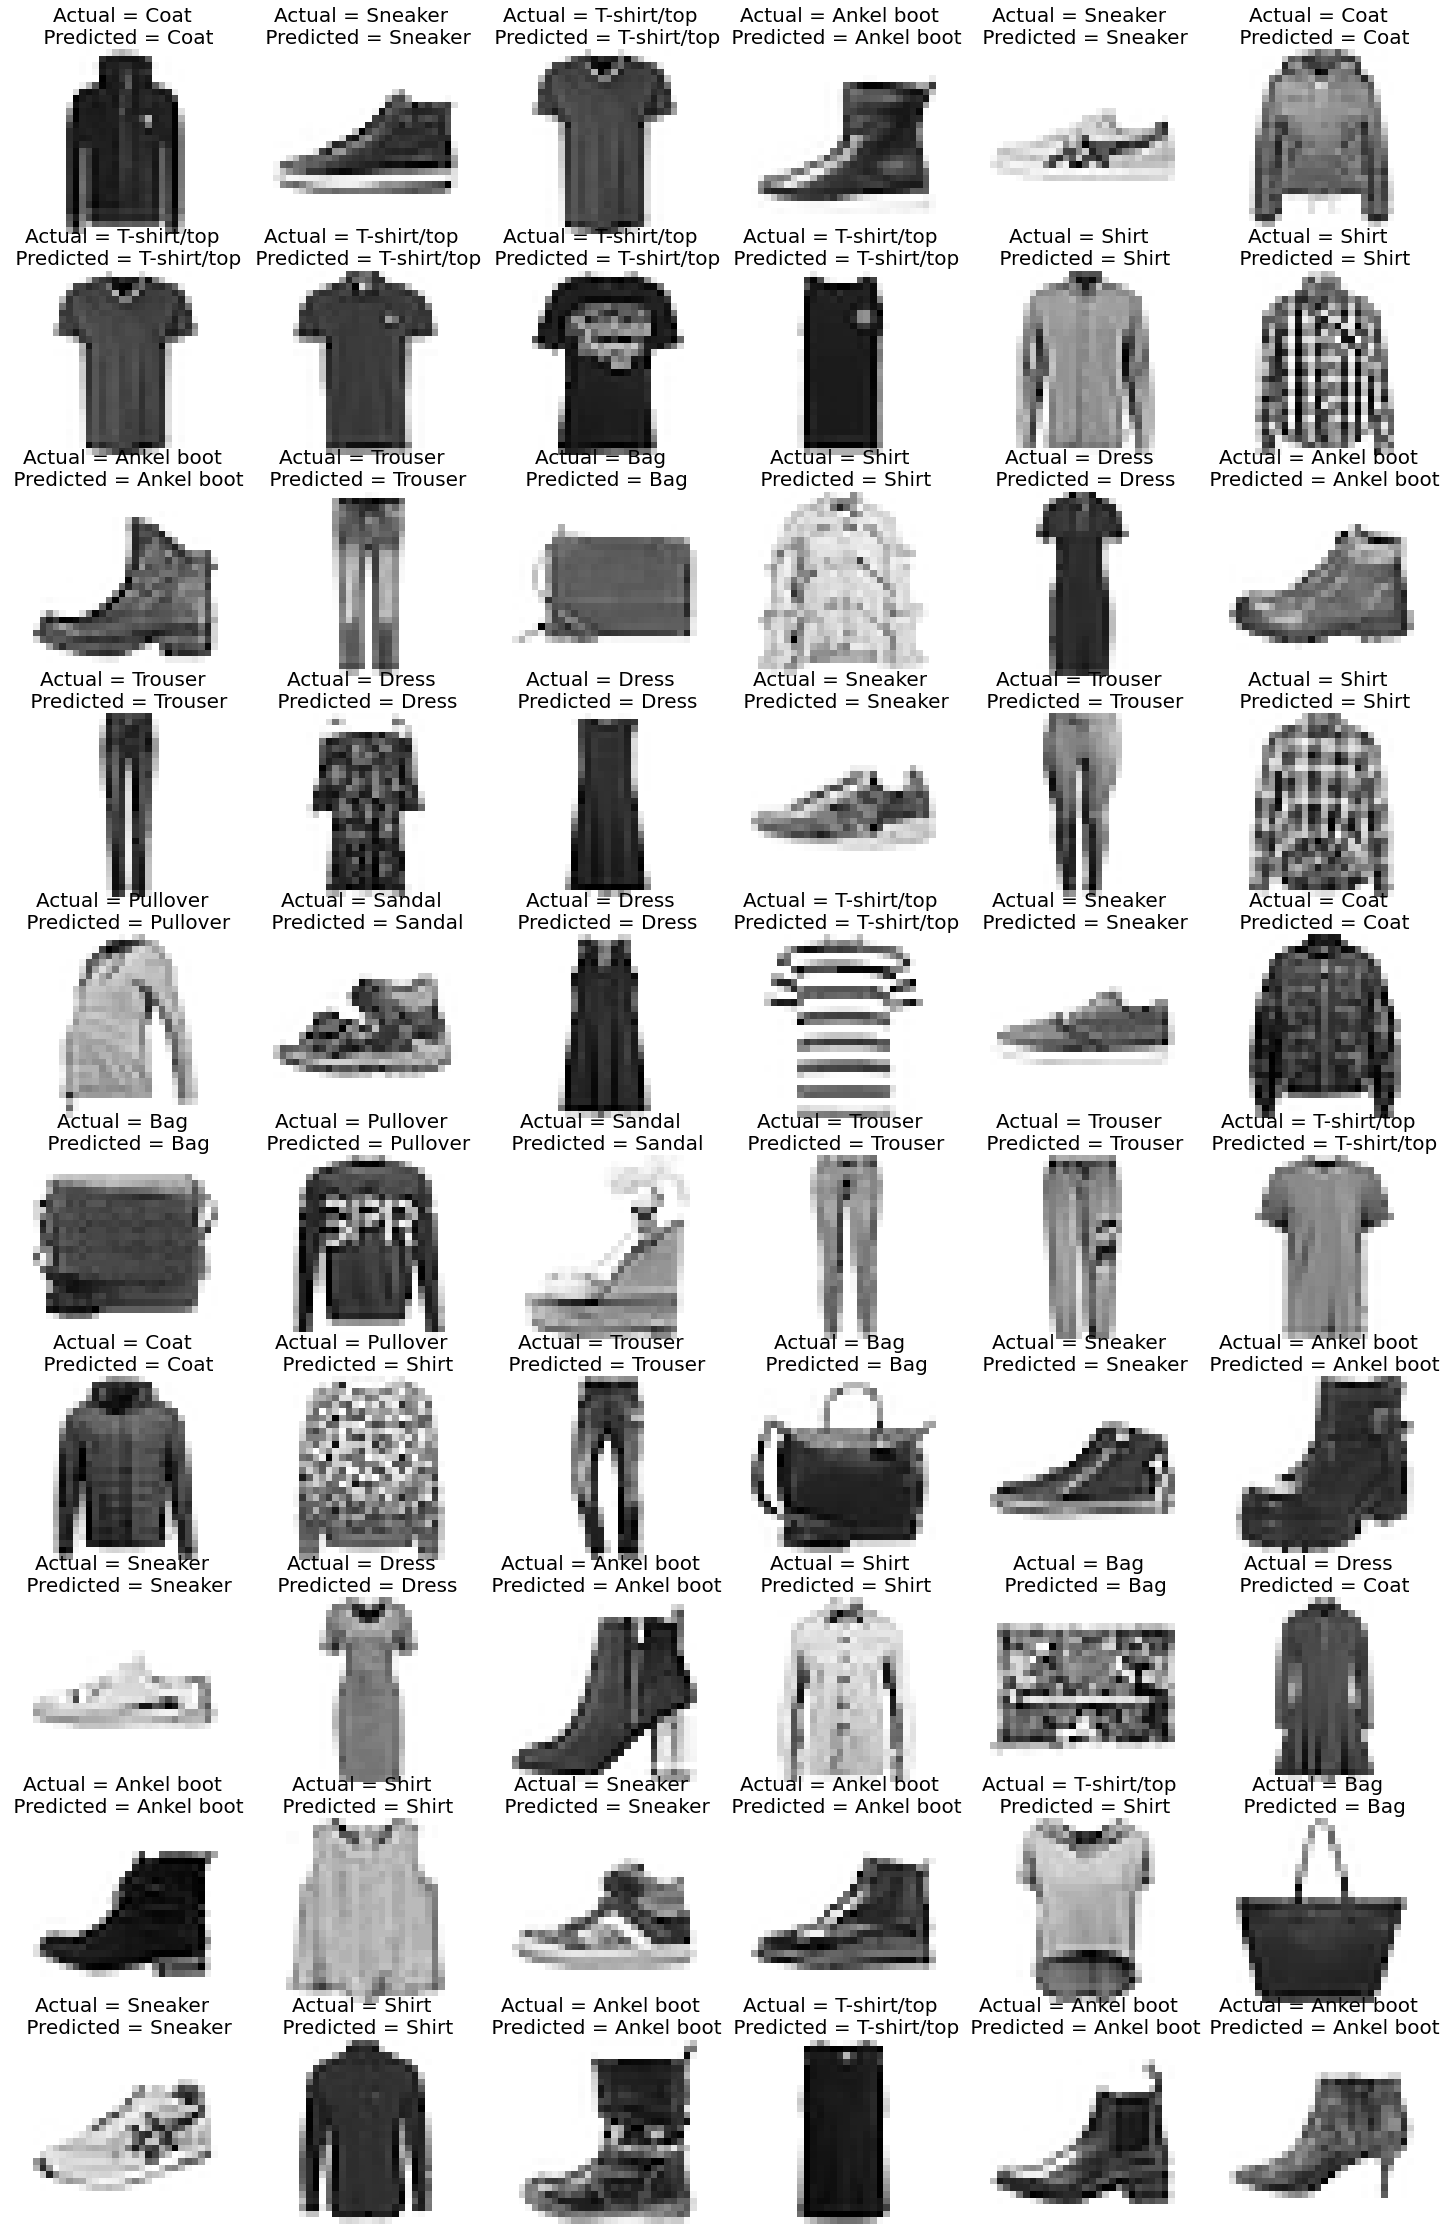

In [ ]:
plt.figure(figsize = (25,40))
j = 1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap = 'Greys')
  plt.axis('off')
  plt.title("Actual = {} \n Predicted = {}".format(class_labels[y_test[i]],class_labels[np.argmax(y_pred[i].round(2))]),fontsize =20)

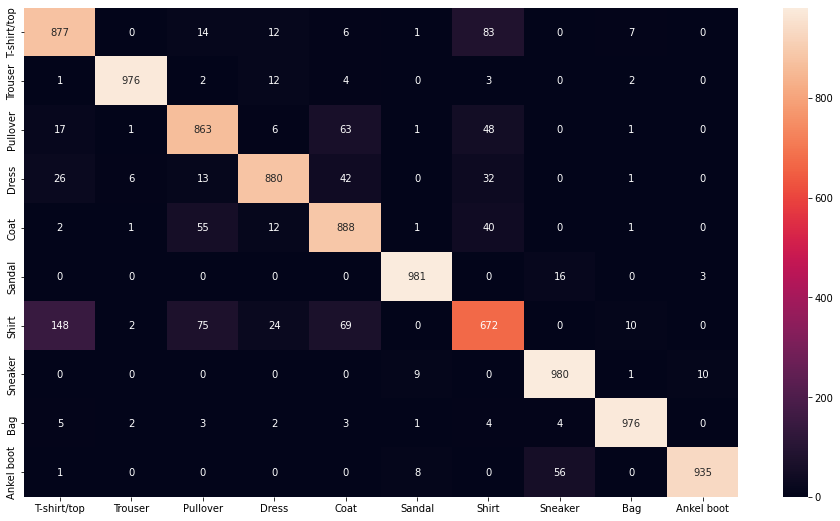

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,[np.argmax(i) for i in y_pred])
import seaborn as sns
plt.figure(figsize = (16,9))
sns.heatmap(cm,annot = True,fmt = 'd',xticklabels=class_labels,yticklabels=class_labels)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,[np.argmax(i) for i in y_pred],target_names= class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.88      0.84      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.84      0.86      0.85      1000
       Dress       0.93      0.88      0.90      1000
        Coat       0.83      0.89      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.67      0.71      1000
     Sneaker       0.93      0.98      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankel boot       0.99      0.94      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Save Model

In [ ]:
model.save('fashion_classification_cnn_model.h5')

In [ ]:
path = "/content/drive/MyDrive/Classroom"
model.save('/content/drive/MyDrive/Classroom/fashion_classification_cnn_model.h5')

In [ ]:
model_deploy = keras.models.load_model('/content/drive/MyDrive/Classroom/fashion_classification_cnn_model.h5')

In [ ]:
model_deploy.predict(X_test).round(2)

array([[0.  , 0.  , 0.  , ..., 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.2 , 0.01, 0.  ]], dtype=float32)

In [ ]:
model_deploy.predict(np.expand_dims(X_test[-1],axis=0)).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.77, 0.  , 0.2 , 0.01, 0.  ]],
      dtype=float32)

In [ ]:
np.argmax(model_deploy.predict(np.expand_dims(X_test[-1],axis=0)).round(2))

5

In [ ]:
class_labels[np.argmax(model_deploy.predict(np.expand_dims(X_test[-1],axis=0)).round(2))]

'Sandal'

# Convolutional Neural Network - Building Complex Model

In [ ]:
from warnings import filters
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32 , kernel_size = 3,strides = (1,1),padding = 'valid',activation = 'relu',input_shape = [28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64 , kernel_size = 3,strides = (1,1),padding = 'same',activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128,activation = 'relu'), 
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units = 256,activation = 'relu'), 
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units = 128,activation = 'relu'), 
    keras.layers.Dense(units = 10,activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
             metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 20,batch_size=512,verbose=1,validation_data = (X_val,y_val))

Epoch 1/20
94/94 [==============================] - 47s 497ms/step - loss: 0.8870 - accuracy: 0.6693 - val_loss: 0.5021 - val_accuracy: 0.8002
Epoch 2/20
94/94 [==============================] - 45s 479ms/step - loss: 0.4828 - accuracy: 0.8207 - val_loss: 0.3980 - val_accuracy: 0.8497
Epoch 3/20
94/94 [==============================] - 47s 496ms/step - loss: 0.3948 - accuracy: 0.8580 - val_loss: 0.3558 - val_accuracy: 0.8683
Epoch 4/20
94/94 [==============================] - 44s 474ms/step - loss: 0.3503 - accuracy: 0.8725 - val_loss: 0.3151 - val_accuracy: 0.8813
Epoch 5/20
94/94 [==============================] - 45s 483ms/step - loss: 0.3184 - accuracy: 0.8826 - val_loss: 0.2808 - val_accuracy: 0.8917
Epoch 6/20
94/94 [==============================] - 44s 467ms/step - loss: 0.2963 - accuracy: 0.8923 - val_loss: 0.2694 - val_accuracy: 0.8977
Epoch 7/20
94/94 [==============================] - 46s 485ms/step - loss: 0.2780 - accuracy: 0.8986 - val_loss: 0.2584 - val_accuracy: 0.9009

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2429 - accuracy: 0.9188


[0.24286974966526031, 0.9187999963760376]

# Very Complex Model

In [ ]:
from warnings import filters
very_complex_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64 , kernel_size = 3,strides = (1,1),padding = 'valid',activation = 'relu',input_shape = [28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128 , kernel_size = 3,strides = (1,1),padding = 'same',activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64 , kernel_size = 3,strides = (1,1),padding = 'same',activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 128,activation = 'relu'), 
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units = 256,activation = 'relu'), 
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units = 256,activation = 'relu'), 
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units = 128,activation = 'relu'), 
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(units = 10,activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
very_complex_model.compile(optimizer = 'adam',
              loss = "sparse_categorical_crossentropy",
             metrics = ['accuracy'])
very_complex_model.fit(X_train,y_train,epochs = 40,batch_size=512,verbose=1,validation_data = (X_val,y_val))

Epoch 1/40
94/94 [==============================] - 5s 36ms/step - loss: 1.0342 - accuracy: 0.6063 - val_loss: 0.5357 - val_accuracy: 0.7872
Epoch 2/40
94/94 [==============================] - 3s 27ms/step - loss: 0.5412 - accuracy: 0.7967 - val_loss: 0.4263 - val_accuracy: 0.8388
Epoch 3/40
94/94 [==============================] - 3s 27ms/step - loss: 0.4478 - accuracy: 0.8381 - val_loss: 0.3603 - val_accuracy: 0.8630
Epoch 4/40
94/94 [==============================] - 3s 27ms/step - loss: 0.3713 - accuracy: 0.8684 - val_loss: 0.3033 - val_accuracy: 0.8884
Epoch 5/40
94/94 [==============================] - 2s 27ms/step - loss: 0.3352 - accuracy: 0.8826 - val_loss: 0.2763 - val_accuracy: 0.9003
Epoch 6/40
94/94 [==============================] - 2s 26ms/step - loss: 0.3065 - accuracy: 0.8942 - val_loss: 0.2642 - val_accuracy: 0.9043
Epoch 7/40
94/94 [==============================] - 3s 27ms/step - loss: 0.2785 - accuracy: 0.9021 - val_loss: 0.2696 - val_accuracy: 0.8997
Epoch 8/40
94

In [ ]:
very_complex_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4084 - accuracy: 0.9183


[0.40836280584335327, 0.9182999730110168]